# Sentiment-Based Word Cloud Generator
This notebook generates word clouds for positive, neutral, and negative sentiment reviews from a CSV file.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

## Define the Function to Generate Word Clouds

In [5]:
def create_word_clouds(file_path, n_words, custom_stopwords=None):
    # Read CSV File
    df_processed = pd.read_csv(file_path)

    # Ensure column names are properly set
    if "Tokens" not in df_processed.columns or "Label" not in df_processed.columns:
        raise ValueError("CSV file must have 'Tokens' and 'Label' columns.")

    # Default stopwords
    if custom_stopwords is None:
        custom_stopwords = set()
    else:
        custom_stopwords = set(custom_stopwords)

    # Filter by sentiment
    positive_reviews = df_processed[df_processed["Label"] == 'positive']["Tokens"]
    neutral_reviews = df_processed[df_processed["Label"] == 'neutral']["Tokens"]
    negative_reviews = df_processed[df_processed["Label"] == 'negative']["Tokens"]

    # Function to generate and display a word cloud
    def generate_word_cloud(reviews, sentiment):
        # Combine all reviews into a single string
        text_input = ' '.join(reviews.astype(str))

        # Filter custom stopwords
        word_counts = Counter(text_input.split())
        filtered_word_counts = {word: count for word, count in word_counts.items() if
                                word.lower() not in custom_stopwords}

        # Get the top N most common words
        top_n_words = dict(Counter(filtered_word_counts).most_common(n_words))

        # Generate Word Cloud
        wordcloud = WordCloud(
            width=800,
            height=600,
            background_color='white'
        ).generate_from_frequencies(top_n_words)

        # Display the Word Cloud
        plt.figure(figsize=(10, 10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{sentiment.capitalize()} Reviews Word Cloud", fontsize=18)
        plt.show()

    # Generate word clouds for each sentiment
    print("\nGenerating word cloud for positive reviews...")
    generate_word_cloud(positive_reviews, "positive")

    print("\nGenerating word cloud for neutral reviews...")
    generate_word_cloud(neutral_reviews, "neutral")

    print("\nGenerating word cloud for negative reviews...")
    generate_word_cloud(negative_reviews, "negative")

## Define Custom Stopwords (Optional)

In [3]:
custom_stopwords = {"app", "spotify", "play", "song", "music", "use", "like", "listen", "good"}

## Provide the Path to the Dataset and Generate Word Clouds


Generating word cloud for positive reviews...


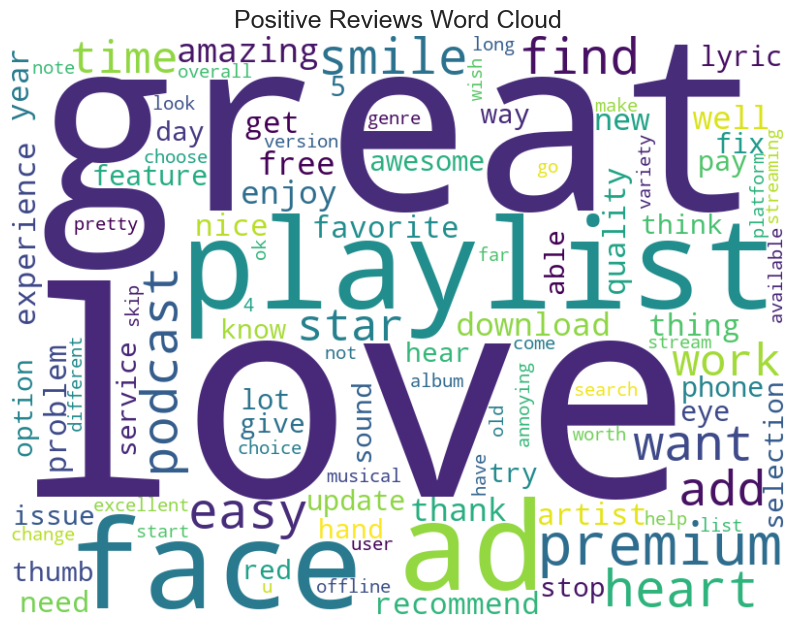


Generating word cloud for neutral reviews...


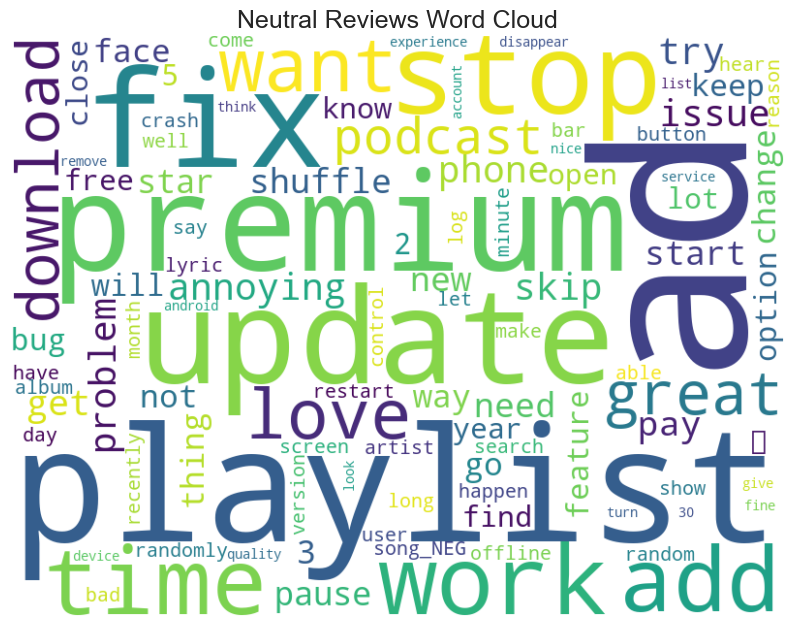


Generating word cloud for negative reviews...


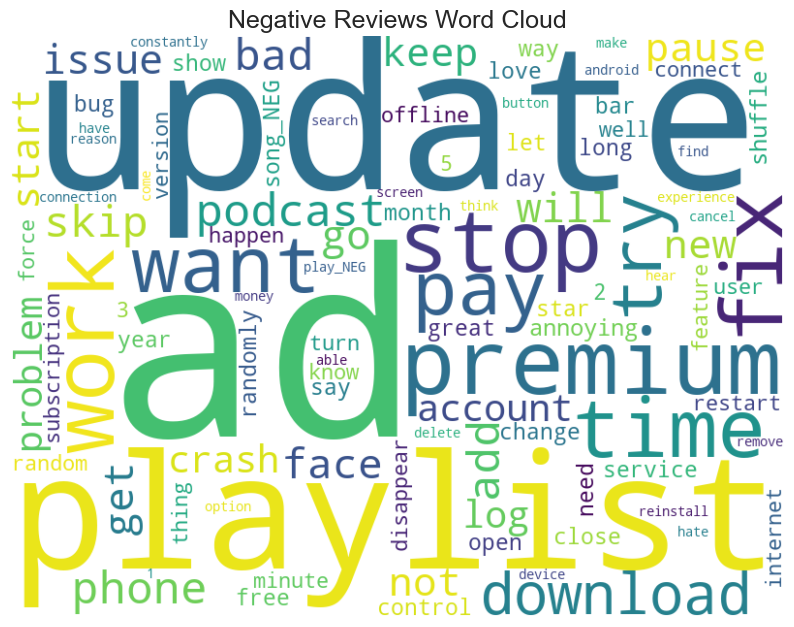

In [6]:
create_word_clouds("Data/reviews_preprocessed.csv", 100, custom_stopwords)